In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
analysis_type = 'No MSAD'

In [3]:
metrics_path = '../metrics'

In [ ]:
cur_dir = os.getcwd()
os.chdir('../../..')
os.system('python3 run_avg_ens.py')
os.chdir(cur_dir)

In [4]:
algorithms = os.listdir(metrics_path)
algorithms_results = dict()
for alg in algorithms:
    metrics = os.listdir(metrics_path + '/' + alg)
    for metric in metrics:
        if 'Recommendation_ACC' not in metric:
            continue
        metric_alg = pd.read_csv(metrics_path + '/' + alg + '/' + metric)
        #metric_alg = metric_alg[metric_alg.iloc[:,1] > 0.3]
        algorithms_results[alg] = metric_alg.iloc[:, 1].values.tolist()        

alg_list = []
ret_list = []
best_method = None
best_acc = 0
for alg in algorithms_results.keys():
    algorithm_results = algorithms_results[alg]
    alg_list += [alg] * len(algorithm_results)
    ret_list += algorithm_results    
    mean_acc = sum(algorithm_results) / len(algorithm_results)
    if mean_acc > best_acc:
        best_acc = mean_acc
        best_method = alg
        
df = pd.DataFrame({'Algorithm': alg_list, 'Accuracy': ret_list})
df = df.sort_values(by='Algorithm')

# Move specified columns to the end
specified_values = ['AVG_ENS', 'TRUE_ORACLE-100']
specified_column = 'Algorithm'

for specified_value in specified_values:
    mask = df[specified_column] == specified_value
    specified_rows = df[mask]
    
    df.drop(df[mask].index, inplace=True)
    df = pd.concat([df, specified_rows], ignore_index=True)



/tmp/ipykernel_1222626/3220072182.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Algorithm', y='Accuracy', data=df, showfliers = False, palette=my_pal, saturation=1, whis=0.241289844)


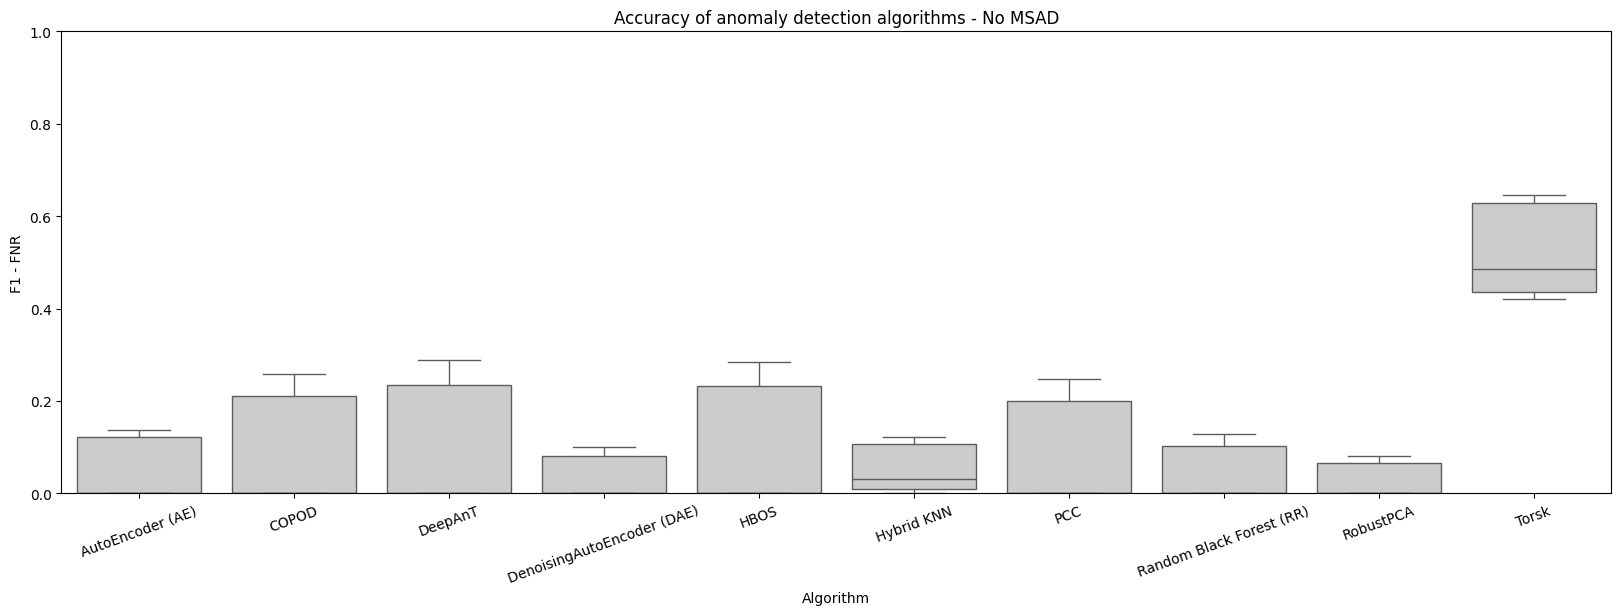

In [5]:
methods_colors = {
    "oracle": "#FFFFFF",
    "avg_ens": "#FF7133",
    "best_ms": "#33D4FF",
    "detectors": "#CCCCCC",
    "feature_based": "#91AAC2",
    "sit": "#FFB522",
    "conv": "#4494FF",
    "conv_2": "#0048FF",
    "rocket": "#EA7DFF",
    "best_ad_train": "#228B22",
    "worst_ad_test": "#8B0000",
}



old_method_order = [alg for alg in algorithms_results.keys() if alg != 'AVG_ENS']
my_pal = {method: methods_colors["detectors"] for method in old_method_order}
my_pal = {**my_pal, **{"AVG_ENS": methods_colors["avg_ens"], 'TRUE_ORACLE-100': methods_colors["oracle"]}}#, best_ms: methods_colors["best_ms"], 'Oracle': methods_colors["oracle"] }}

tmp_methods = old_method_order + ['AVG_ENS']#, best_ms, 'Oracle']
#bplot = sns.boxplot(data=df[tmp_methods], palette=my_pal, showfliers = False, saturation=1, whis=0.241289844)


plt.figure(figsize=(20, 6))
ax = sns.boxplot(x='Algorithm', y='Accuracy', data=df, showfliers = False, palette=my_pal, saturation=1, whis=0.241289844)
#bplot = sns.boxplot(data=df[tmp_methods], palette=my_pal, showfliers = False, saturation=1, whis=0.241289844)
plt.title('Accuracy of anomaly detection algorithms - ' + analysis_type)
plt.xlabel('Algorithm')
plt.ylabel('F1 - FNR')
plt.xticks(rotation=20)
ax.set(ylim=(0, 1)) 

plt.savefig('plot.png')


In [157]:
df.to_csv('results_noMSAD.csv', index=False)

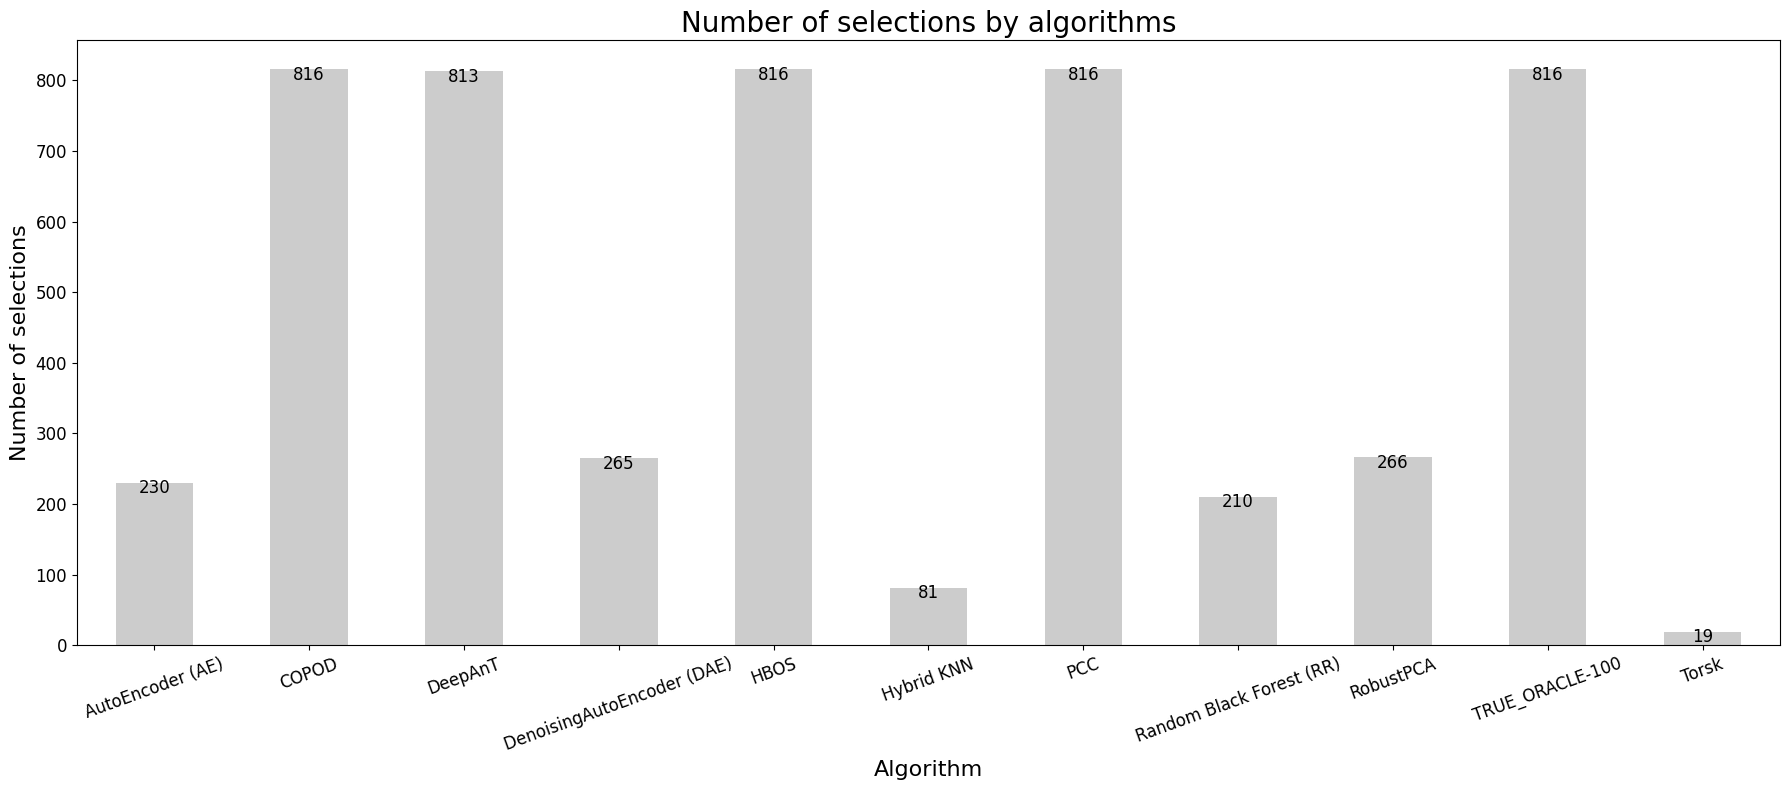

In [158]:
import matplotlib.pyplot as plt

exclude_algs = ['AVG_ENS']
alg_seleced_num = df['Algorithm'].value_counts()
alg_seleced_num = alg_seleced_num[~alg_seleced_num.index.isin(exclude_algs)]
alg_seleced_num = alg_seleced_num.sort_index()

# Plotting the graph
plt.figure(figsize=(18, 8))
ax = alg_seleced_num.plot(kind='bar', color=methods_colors['detectors'])  # Plot a bar graph

# Set the title and labels
plt.title('Number of selections by algorithms', fontsize=20)
plt.xlabel('Algorithm', fontsize=16)
plt.ylabel('Number of selections', fontsize=16)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

# Add values to each bar
for i, v in enumerate(alg_seleced_num):
    ax.text(i, v + 5, str(v), ha='center', va='top', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# compare between runs

In [51]:
df_noMSAD_pick4best = pd.read_csv('result_noMSAD_pick4best.csv')
df_noMSAD_pick4best

,Algorithm,Accuracy
0,AutoEncoder (AE),0.524374
1,AutoEncoder (AE),0.000000
2,AutoEncoder (AE),0.000000
3,AutoEncoder (AE),0.000000
4,AutoEncoder (AE),0.000000
...,...,...
2182,AVG_ENS,0.000000
2183,AVG_ENS,0.000000
2184,AVG_ENS,0.000000
2185,AVG_ENS,0.000000


In [52]:
df_useMSAD_trained20_infer2122 = pd.read_csv('result_useMSAD_trained20_infer2122.csv')
df_useMSAD_trained20_infer2122

,Algorithm,Accuracy
0,AutoEncoder (AE),0.000000
1,AutoEncoder (AE),0.217310
2,AutoEncoder (AE),0.000000
3,AutoEncoder (AE),0.000000
4,AutoEncoder (AE),0.000000
...,...,...
1664,AVG_ENS,0.000000
1665,AVG_ENS,0.000000
1666,AVG_ENS,0.999995
1667,AVG_ENS,0.000000


In [ ]:
df_noMSAD_pick4best[df_noMSAD_pick4best['Algorithm'] == 'AVG_ENS'].iloc[:, 1].values.tolist()

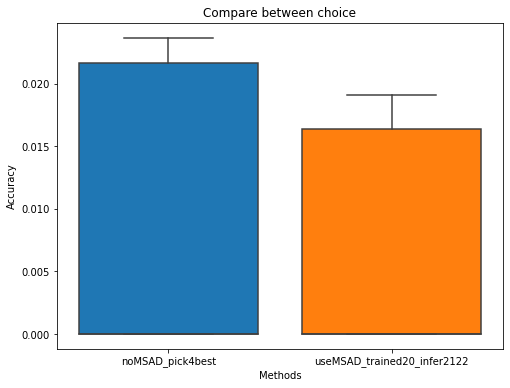

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example lists with different lengths
noMSAD_pick4best = df_noMSAD_pick4best[df_noMSAD_pick4best['Algorithm'] == 'AVG_ENS'].iloc[:, 1].values.tolist()
useMSAD_trained20_infer2122 = df_useMSAD_trained20_infer2122[df_useMSAD_trained20_infer2122['Algorithm'] == 'AVG_ENS'].iloc[:, 1].values.tolist()


# Combine the lists into a single list of lists
all_data = [noMSAD_pick4best, useMSAD_trained20_infer2122]
custom_labels = ['noMSAD_pick4best', 'useMSAD_trained20_infer2122']

# Plot boxplot using seaborn with custom x-axis tick labels
plt.figure(figsize=(8, 6))
sns.boxplot(data=all_data, showfliers = False, saturation=1, whis=0.241289844)
plt.title('Accuracy comparision between different MSAD usage appr')
plt.xlabel('Methods')
plt.ylabel('Accuracy')

# Set custom x-axis tick labels
plt.xticks(range(len(custom_labels)), custom_labels)

plt.show()


In [12]:
algorithms = os.listdir(metrics_path)
algorithms_results = defaultdict()
for alg in algorithms:
    metrics = os.listdir(metrics_path + '/' + alg)
    for metric in metrics:
        if 'Recommendation_ACC' not in metric:
            continue
        metric_alg = pd.read_csv(metrics_path + '/' + alg + '/' + metric)
        algorithms_results[alg] = [metric_alg.iloc[:, 0].values.tolist(), metric_alg.iloc[:, 1].values.tolist()]

alg_list = []
ret_list = []
best_method = None
best_acc = 0
for alg in algorithms_results.keys():
    algorithm_results = algorithms_results[alg]
    alg_list += [alg] * len(algorithm_results)
    ret_list += algorithm_results    
    mean_acc = sum(algorithm_results[1]) / len(algorithm_results)
    if mean_acc > best_acc:
        best_acc = mean_acc
        best_method = alg
        
df = pd.DataFrame({'Algorithm': alg_list, 'Accuracy': ret_list})

# Specified value and column
specified_value = 'AVG_ENS'
specified_column = 'Algorithm'

# Identify rows with specified value in specified column
mask = df[specified_column] == specified_value
specified_rows = df[mask]

# Drop specified rows from DataFrame
df.drop(df[mask].index, inplace=True)

# Append specified rows to the end of DataFrame
df = pd.concat([df, specified_rows], ignore_index=True)



,Algorithm,Accuracy
0,DenoisingAutoEncoder (DAE),0.684937
1,DenoisingAutoEncoder (DAE),0.682320
2,DenoisingAutoEncoder (DAE),0.856171
3,DenoisingAutoEncoder (DAE),0.949908
4,DenoisingAutoEncoder (DAE),0.870747
...,...,...
1664,AVG_ENS,0.000000
1665,AVG_ENS,0.000000
1666,AVG_ENS,0.000000
1667,AVG_ENS,0.000000


In [ ]:
1